In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
from datetime import datetime, timedelta
import seaborn as sns
import time

In [2]:
vic = pd.read_csv('data/VIC.csv')
fpt = pd.read_csv('data/FPT.csv')
pnj = pd.read_csv('data/PNJ.csv')
msn = pd.read_csv('data/MSN.csv')

files = {
    'vic' : vic,
    'fpt' : fpt,
    'pnj' : pnj,
    'msn' : msn
}

In [3]:
vic.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


In [4]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Ticker         101266 non-null  object 
 1   Date/Time      101266 non-null  object 
 2   Open           101266 non-null  float64
 3   High           101266 non-null  float64
 4   Low            101266 non-null  float64
 5   Close          101266 non-null  float64
 6   Volume         101266 non-null  int64  
 7   Open Interest  101266 non-null  int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.2+ MB


In [5]:
vic.describe()

,Open,High,Low,Close,Volume,Open Interest
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.0
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.0
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.0
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,0.0
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.0
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.0
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.0
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,0.0


In [6]:
for name, df in files.items():
    print(f'Open Interest unique values of {name}:', df['Open Interest'].unique())

Open Interest unique values of vic: [0]
Open Interest unique values of fpt: [0]
Open Interest unique values of pnj: [0]
Open Interest unique values of msn: [0]


The column 'Open Interest' have only one unique values is 0, therefore I dropped this column since it will not effect the forecasting result.

In [7]:
#Clear column Open Interest in files
for name, df in files.items():
    df.drop(columns = ['Open Interest'], inplace = True)

In [8]:
def price_change(data):
    for key in data:
        df = files[key]
        df['Price Change'] = df['Close'] - df['Close'].shift(1)
        df.at[0, 'Price Change'] = 0
        print(f'Calculated Price Change for {key}')

Next, let's see is there any duplicate and drop them

In [9]:
#Check for duplicates
for name, df in files.items():
    init_len = len(df)
    df.drop_duplicates(keep = False, inplace = True)
    final_len = len(df)
    print(f'Found {init_len - final_len} dublicates in {name}')

Found 0 dublicates in vic
Found 0 dublicates in fpt
Found 0 dublicates in pnj
Found 0 dublicates in msn


Now, we calculate the price change and convert Date/Time column into suitable data type

In [10]:
#Calculate the price change
price_change([df for df in files.keys()])
#zero_change([df for df in files.keys()])

#convert datetime
for name, df in files.items():
    files[name]['Date/Time'] = pd.to_datetime(df['Date/Time'])
    print(f'Converted datatime {name}')

Calculated Price Change for vic
Calculated Price Change for fpt
Calculated Price Change for pnj
Calculated Price Change for msn
Converted datatime vic
Converted datatime fpt
Converted datatime pnj
Converted datatime msn


In [11]:
vic.describe()

,Open,High,Low,Close,Volume,Price Change
count,101266.000000,101266.000000,101266.000000,101266.000000,1.012660e+05,101266.000000
mean,105.376460,105.418519,105.334147,105.378791,3.182640e+03,0.000071
std,11.543158,11.535584,11.552338,11.545054,1.469814e+04,0.199337
min,68.000000,68.000000,68.000000,68.000000,1.000000e+01,-7.400000
25%,95.400000,95.400000,95.300000,95.400000,2.300000e+02,0.000000
50%,105.300000,105.300000,105.200000,105.300000,1.020000e+03,0.000000
75%,115.800000,115.900000,115.800000,115.800000,3.000000e+03,0.000000
max,126.100000,126.500000,126.100000,126.500000,1.468390e+06,5.000000


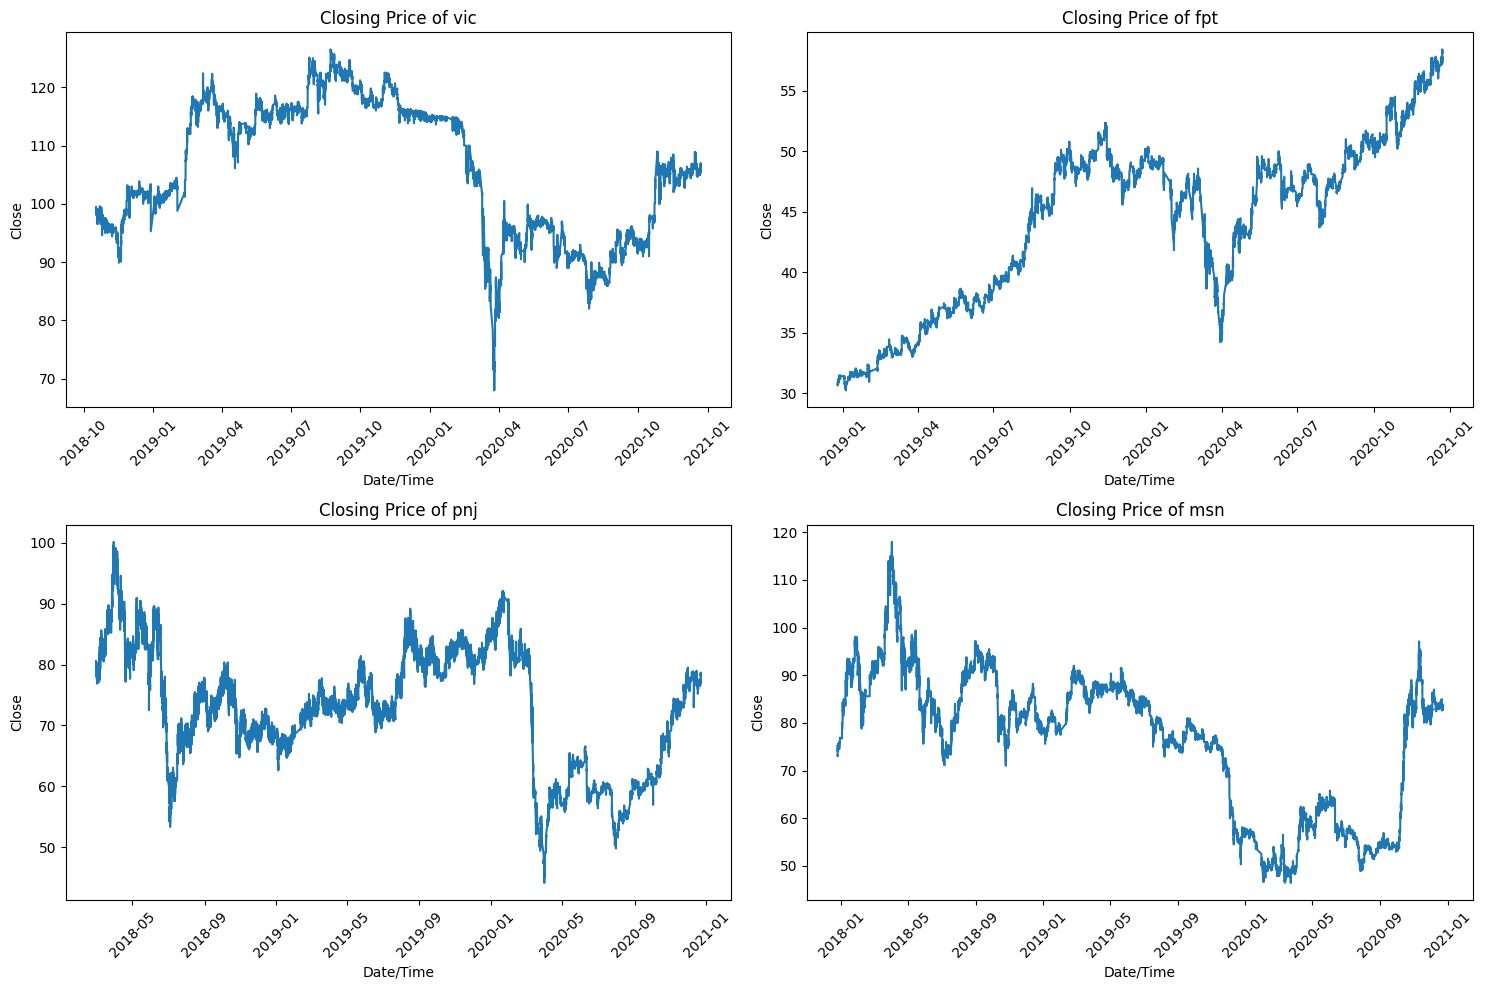

In [12]:
plt.figure(figsize = (15,10))
plt.subplots_adjust(top = 1.25, bottom = 1.2)

for i, (name, df) in enumerate(files.items(), 1):
    plt.subplot(2,2,i)
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    plt.plot(df['Date/Time'], df['Close'])
    plt.xlabel('Date/Time')
    plt.ylabel('Close')
    plt.title(f'Closing Price of {name}')
    plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

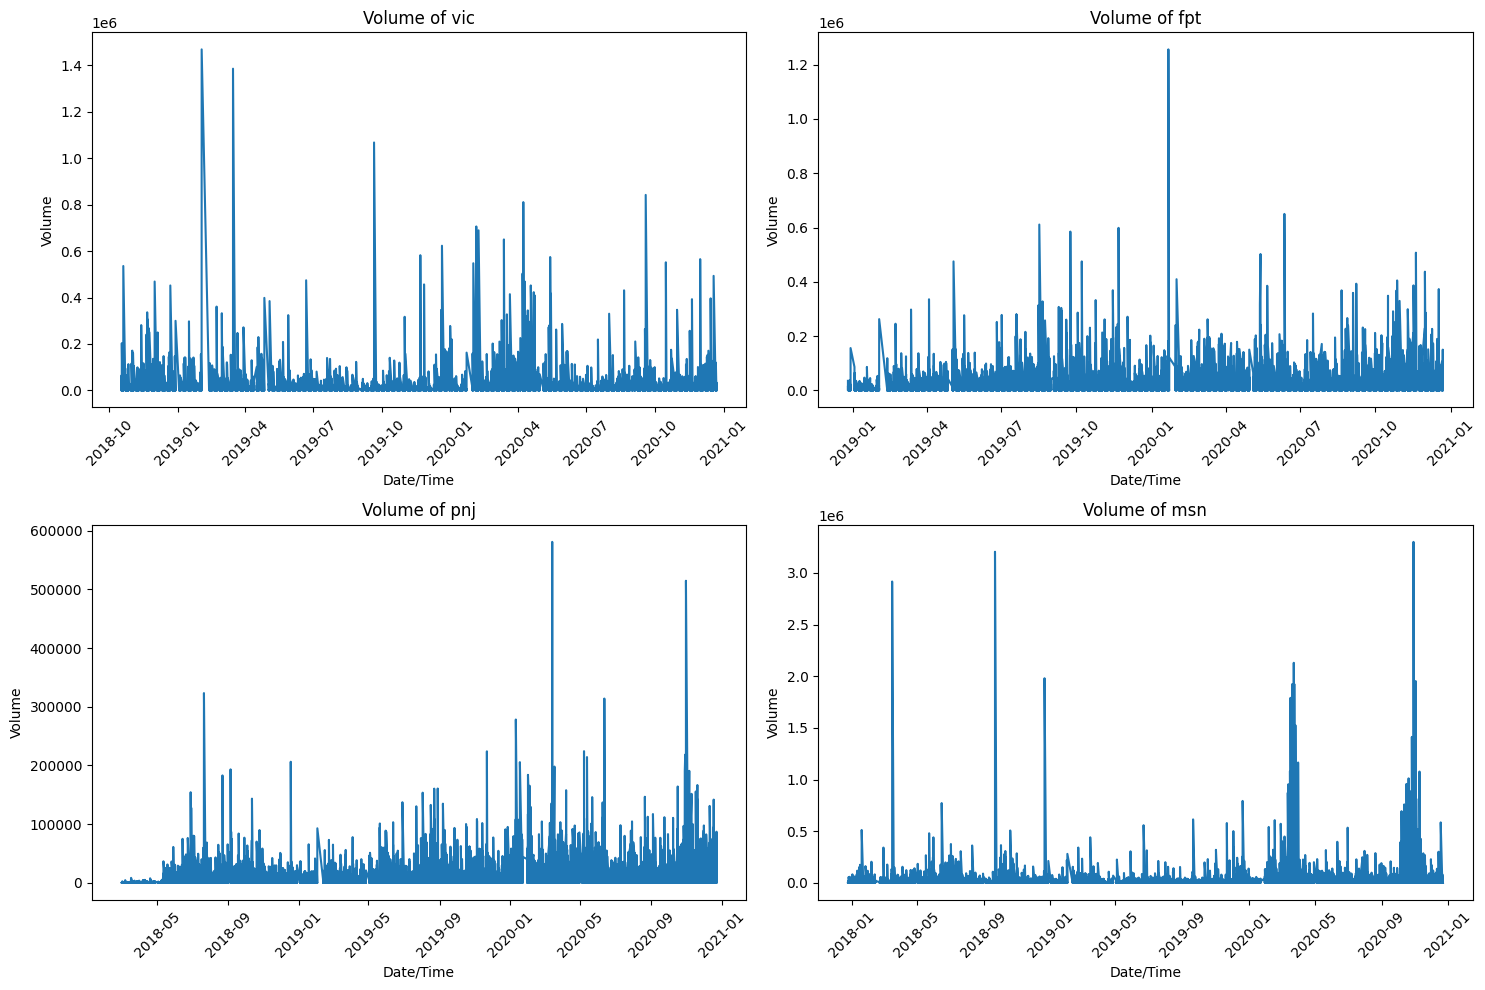

In [13]:
plt.figure(figsize=(15,10))
plt.subplots_adjust(top = 1.25, bottom=1.2)

for i, (name, df) in enumerate(files.items(), 1):
    plt.subplot(2,2,i)
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    plt.plot(df['Date/Time'], df['Volume'])
    plt.xlabel('Date/Time')
    plt.ylabel('Volume')
    plt.title(f"Volume of {name}")
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

In [14]:
for i, (name, df) in enumerate(files.items(), 1):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df.set_index('Date/Time', inplace = True)

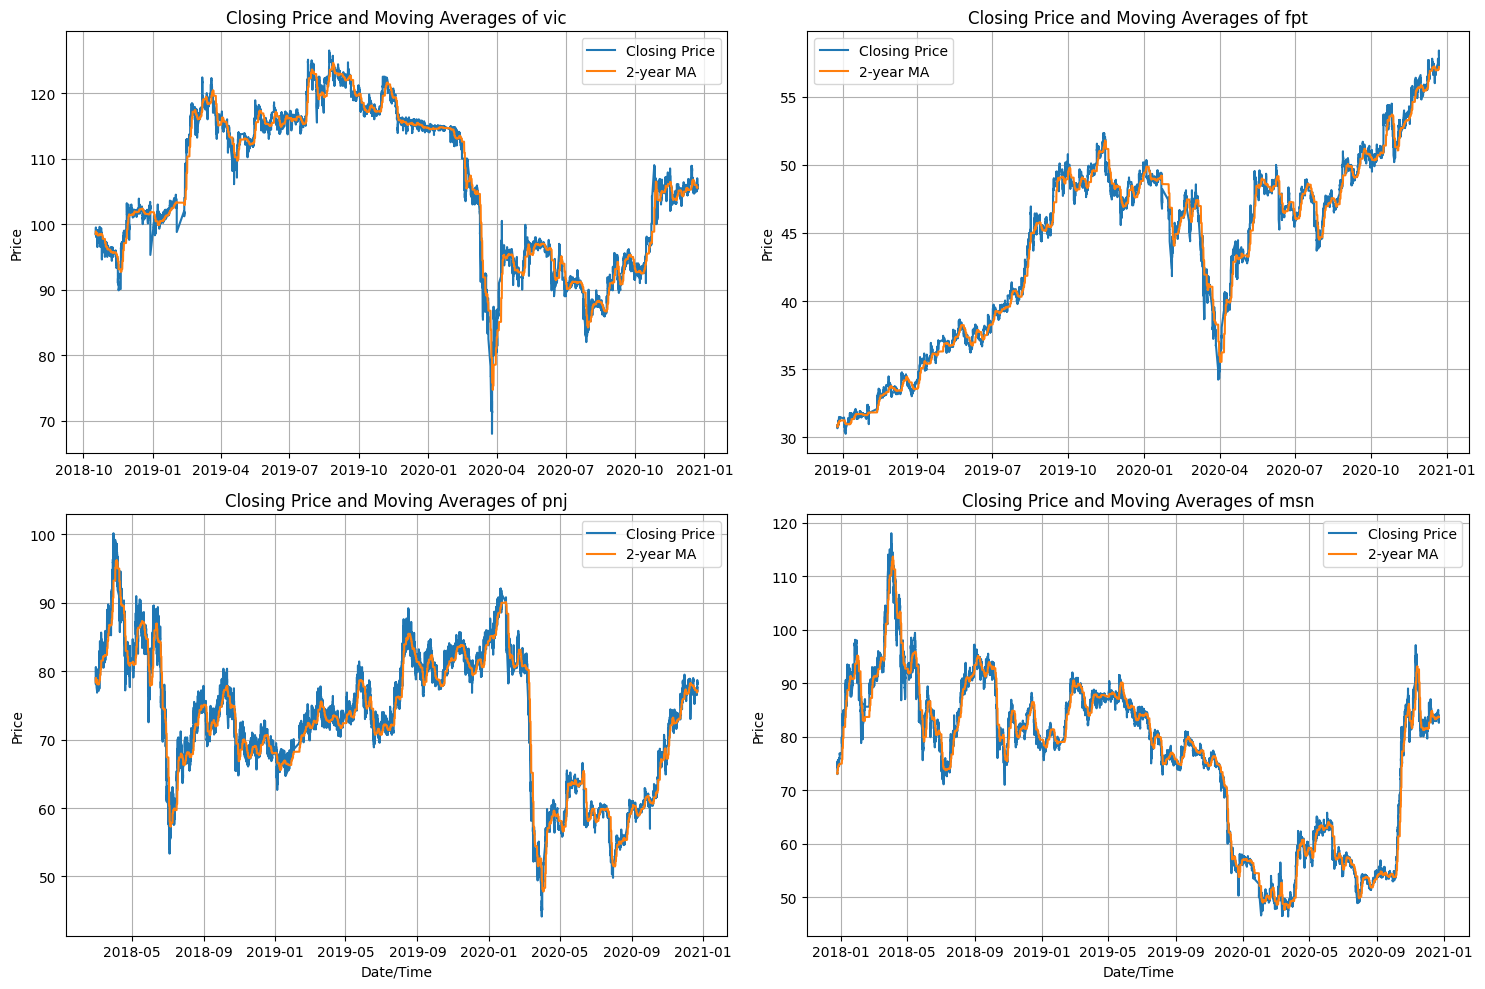

In [15]:
time_periods = [24] #in months

#create subplots dor each ticker
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(15,10))
fig.subplots_adjust(top = 1.25, bottom = 0.8)

for i, (name, df) in enumerate(files.items(), 1):
    row = (i-1) // 2
    col = (i-1) % 2
    ax = axes[row, col]
    
    ax.plot(df.index, df['Close'], label='Closing Price')
    
    for period in time_periods:
        ma = df['Close']. rolling(window = period*30, min_periods = 1).mean() #Assuming 30 trading days in a month
        ax.plot(df.index, ma, label = f'{int(period/12)}-year MA', linestyle = '-')
    
    ax.set_ylabel('Price')
    ax.set_title(f'Closing Price and Moving Averages of {name}')
    ax.grid()
    ax.legend()

for ax in axes[1, :]:
    ax.set_xlabel('Date/Time')
    
plt.tight_layout()
plt.show()

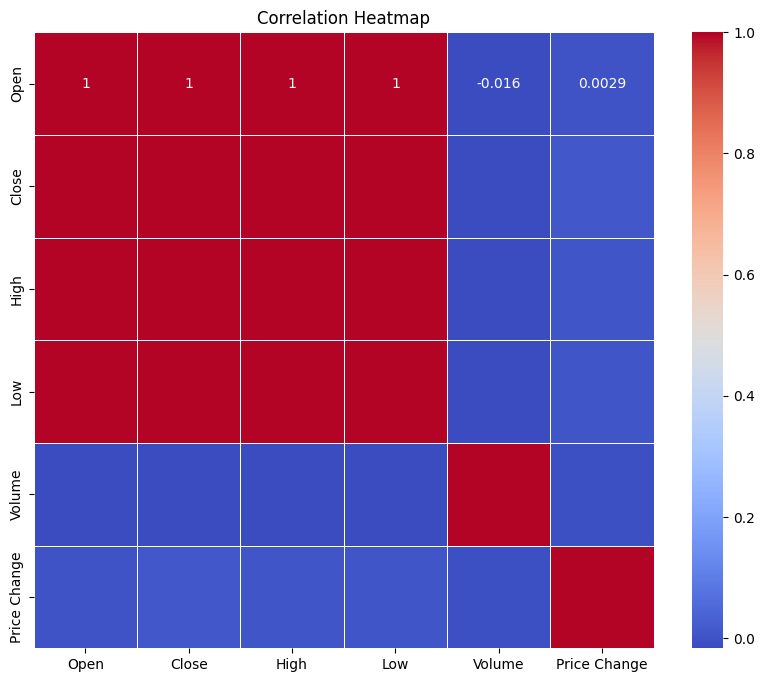

In [16]:
#Select the columns of interest
columns_of_interest = ['Open', 'Close', 'High', 'Low', 'Volume', 'Price Change']

# Caculate the correctlation matrix
correlation_matrix = vic[columns_of_interest].corr()

#Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

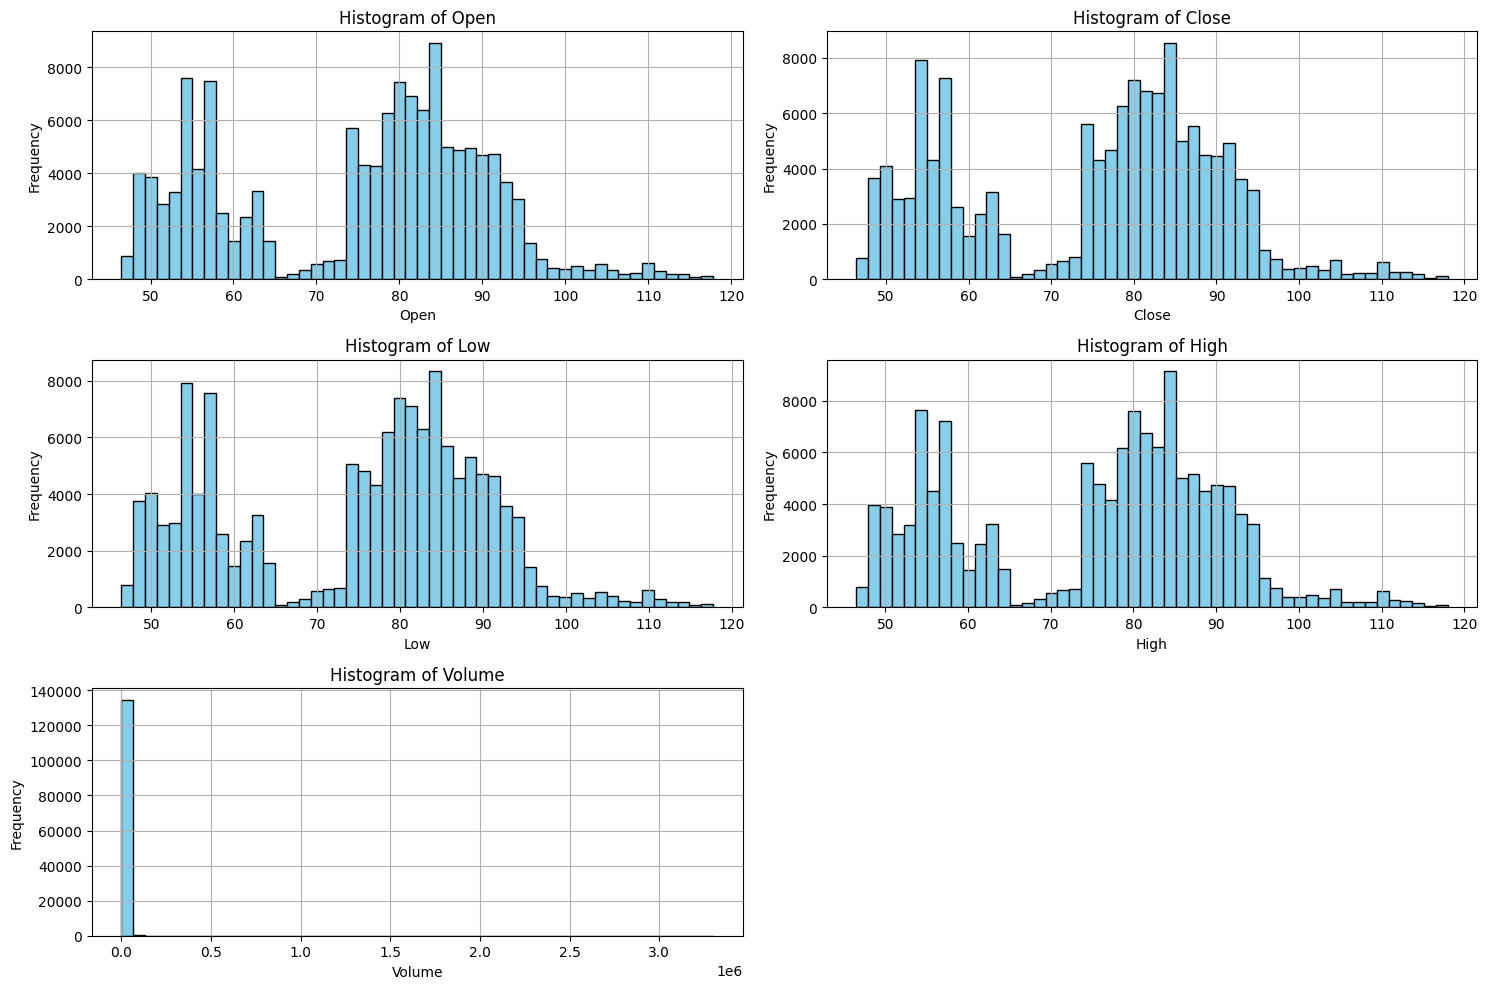

In [17]:
# Get the list of feature columns
feature_columns = ['Open', 'Close', 'Low', 'High', 'Volume']

#Creat subplots for each feature
plt.figure(figsize=(15,10))
for i, feature in enumerate(feature_columns, 1):
    plt.subplot(3,2,i)
    df[feature].hist(bins = 50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

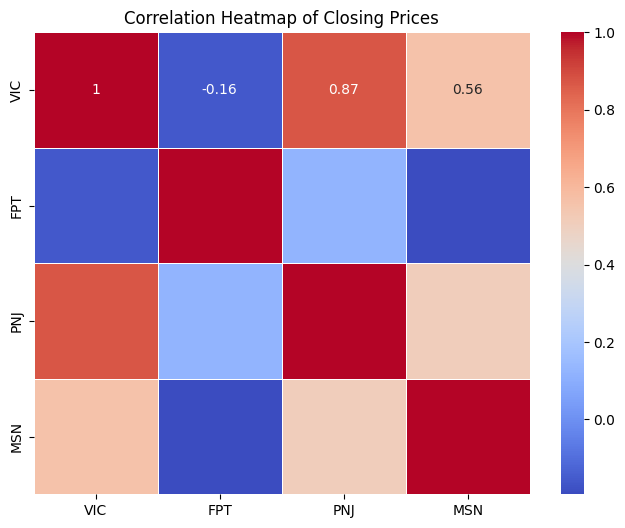

In [18]:
tickers = ['VIC', 'FPT', 'PNJ', 'MSN']

closing_prices = {}

#Extract and store the closing prices
for ticker in tickers:
    df = eval(ticker.lower())
    closing_prices[ticker] = df['Close']
    
#Creat a DataFrame from the closing prices
closing_df = pd.DataFrame(closing_prices)

#calculate the correlation matrix
correlation_matrix = closing_df.corr()

#Create a heatmap to visualize the correlations
plt.figure(figsize = (8, 6))
sns.heatmap(correlation_matrix, annot = True,  cmap='coolwarm', linewidths = 0.5)
plt.title('Correlation Heatmap of Closing Prices')
plt.show()

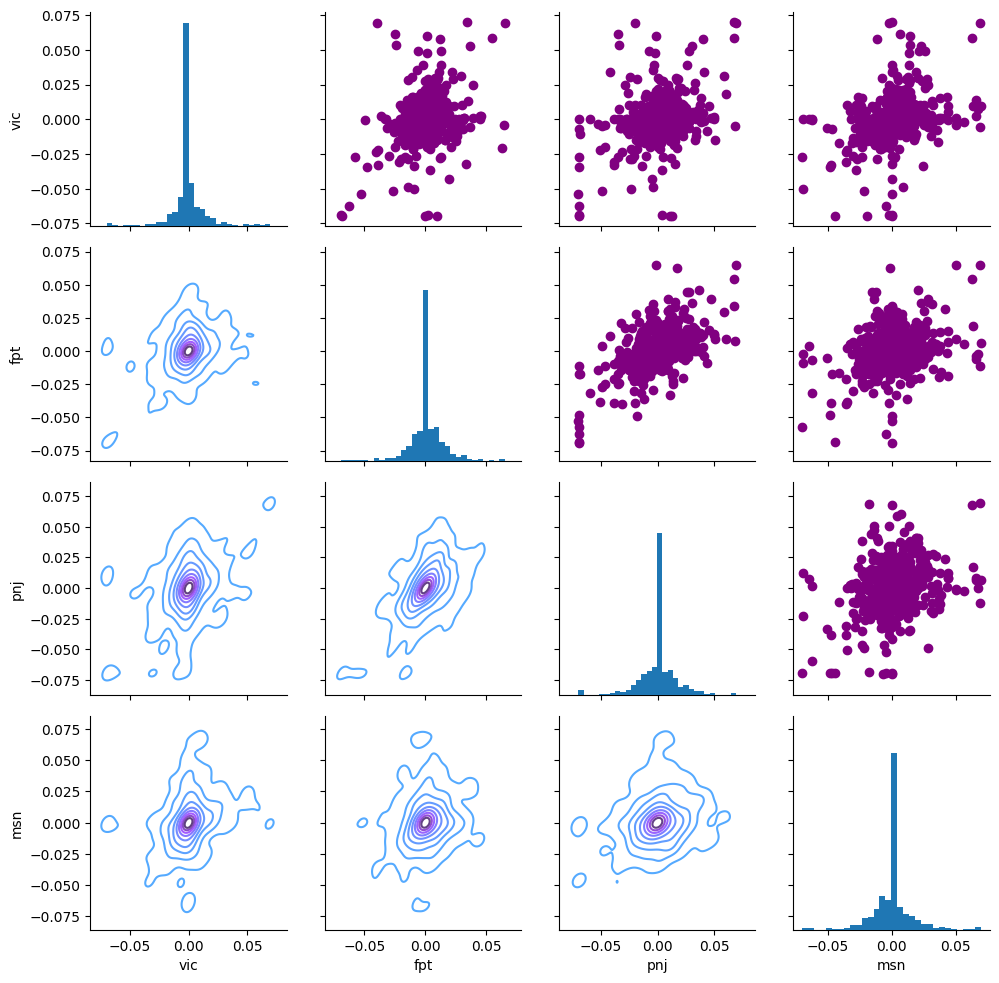

In [19]:
# Combine closing prices into a single DataFrame
closing_df = pd.concat([df['Close'] for df in files.values()], axis = 1)
closing_df.columns = files.keys()

#Resample to daily frequency and calculate monthly returns
daily_returns = closing_df.resample('D').last().pct_change().dropna()

#Set up the pair plot
returns_fig = sns.PairGrid(daily_returns)

#Usin map_upper to create scatter plots in the upper triangle
returns_fig.map_upper(plt.scatter, color = 'purple')

#Using map_lower to create KDE plots in the lower triangle
returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

#Using map_diag to creatr histograms on the diagonal
returns_fig.map_diag(plt.hist, bins = 30)

plt.show()

Seem like closing stock price of VIC versus PNJ and MSN have high correlation. Let's explore more on the price change

In [20]:
def binary_change(data, threshold = 0):
    for key in data:
        df = files[key]
        df['Binary Change'] = np.where((df['Price Change'] <= threshold) & (df['Price Change'] >= -threshold), 1, 0)
        print(f'Calculated Binary Indicator for {key}')

In [21]:
binary_change([df for df in files.keys()])

Calculated Binary Indicator for vic
Calculated Binary Indicator for fpt
Calculated Binary Indicator for pnj
Calculated Binary Indicator for msn


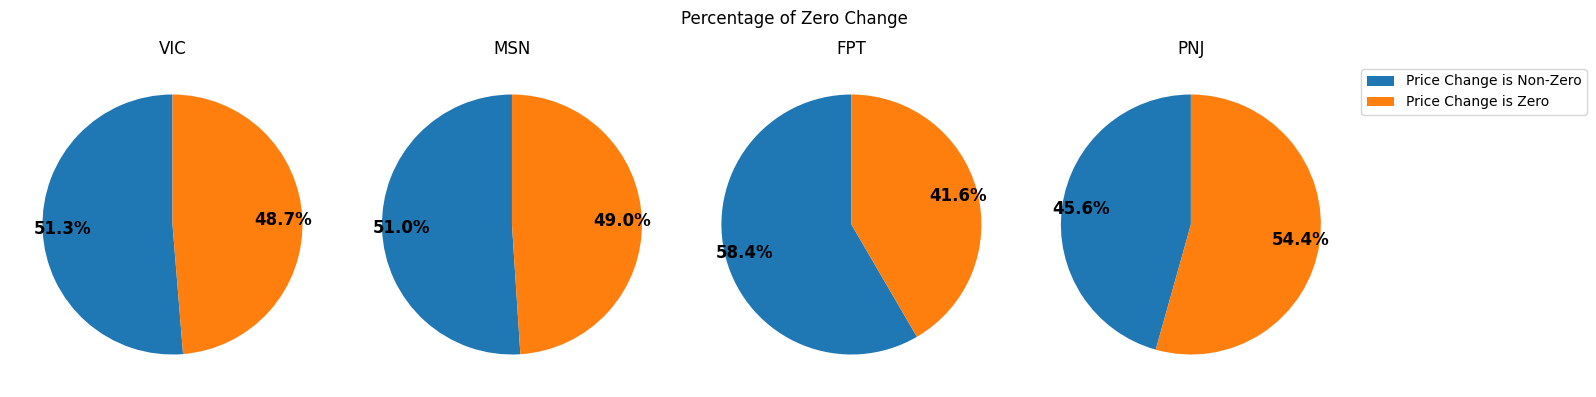

In [22]:
fig, axes = plt.subplots(1, 4, figsize = (16, 4))
fig.suptitle('Percentage of Zero Change')

#dataFrames
dataframes = [vic, msn, fpt, pnj]

#labels fo the pie chart
labels = ['Price Change is Non-Zero', 'Price Change is Zero']

legend_handles = []
for i, df in enumerate(dataframes):
    #percentage of 'Zero Change' values
    zero_count = (df['Binary Change'] == 0).sum()
    non_zero_count = (df['Binary Change'] == 1).sum()
    total_count = len(df)
    percentages = [non_zero_count / total_count * 100, zero_count / total_count * 100]
    ax = axes[i]
    wedges, _, autotexts = ax.pie(
        percentages,
        labels = ['',''],
        autopct = '%1.1f%%',
        startangle=90,
        pctdistance=0.85
    )
    
    #Add the handles for legend from the first pie chart
    if i == 0:
        legend_handles.extend(wedges)
    
    ax.set_title(df['Ticker']. iloc[0])
    
    #Display numboers inside the pie chart
    for autotext in autotexts:
        autotext.set(size = 12, weight = 'bold')
        
legend = fig.legend(legend_handles, labels, loc = 'upper left', bbox_to_anchor = (0.85, 0.85))

plt.tight_layout()
plt.subplots_adjust(top = 0.85, right = 0.85)
plt.subplots_adjust(top = 0.85, right = 0.85)
plt.show()

The price change that is zero accounts dor almost 50% in all dataset. The idea is that we will building an ensemble model ro classify zero or non-zero price change and then feed only the non-zero price into regressor model.

In [23]:
vic

,Ticker,Open,High,Low,Close,Volume,Price Change,Binary Change
Date/Time,,,,,,,,
2018-10-17 09:39:00,VIC,98.5,98.5,98.5,98.5,390,0.0,1
2018-10-17 09:40:00,VIC,98.5,98.5,98.5,98.5,760,0.0,1
2018-10-17 09:41:00,VIC,98.6,98.6,98.6,98.6,2060,0.1,0
2018-10-17 09:42:00,VIC,98.6,98.6,98.6,98.6,5540,0.0,1
2018-10-17 09:43:00,VIC,98.6,98.7,98.6,98.7,760,0.1,0
...,...,...,...,...,...,...,...,...
2020-12-22 14:22:00,VIC,105.8,105.8,105.7,105.7,1870,-0.1,0
2020-12-22 14:23:00,VIC,105.7,105.7,105.7,105.7,2510,0.0,1
2020-12-22 14:24:00,VIC,105.7,105.7,105.7,105.7,3620,0.0,1


## Modeling

In [23]:
import tensorflow as tf
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.metrics import Precision, Recall

In this part, I will train some notable model for time-series forecasting to predict the stock price change of all 4 tickers. I will concarenate all 4 tables of tickers and feed the data into one single training model.

## LSTM

In [28]:
#Some functions 
def checkpoint_call(model_name = None, monitor = 'val_loss'):
    if model_name == None:
        raise NameError('Need to specify model name.')
        
    checkpoint_path = 'outputs/checkpoints'
    checkpoint_path = checkpoint_path + f'/{model_name}'
    
    if not os.path.exists(f'{checkpoint_path}'):
        os.makedirs(f'{checkpoint_path}')
        
    model_ver = max([int(i) for i in os.listdir(f"{checkpoint_path}")] +[0]) +1
    filepath = f"{checkpoint_path}/{model_ver}/ "+"{epoch}.weights.h5"
    
    return ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_weights_only=True, save_best_only=True, mode='min')

#Test checkpoint_call 1
# def checkpoint_call(model_name=None, monitor='val_loss'):
#     if model_name is None:
#         raise NameError('Need to specify model name.')
        
#     checkpoint_path = os.path.join('outputs', 'checkpoints', model_name)
    
#     if not os.path.exists(checkpoint_path):
#         os.makedirs(checkpoint_path)
        
#     # Lọc các thư mục chỉ chứa số nguyên và lấy phiên bản lớn nhất
#     model_ver = max([int(i) for i in os.listdir(checkpoint_path) if i.isdigit()] + [0]) + 1
    
#     # Đảm bảo tệp có định dạng `.weights.h5`
#     filepath = os.path.join(checkpoint_path, f"{model_ver}", "{epoch}.weights.h5")
    
#     return ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_weights_only=True, save_best_only=True, mode='min')

# Test checkpoint_call 2: change file weight to keras
# def checkpoint_call(model_name=None, monitor='val_loss'):
#     if model_name is None:
#         raise NameError('Need to specify model name.')
        
#     checkpoint_path = os.path.join('outputs', 'checkpoints', model_name)
    
#     if not os.path.exists(checkpoint_path):
#         os.makedirs(checkpoint_path)
        
#     # Lọc các thư mục chỉ chứa số nguyên và lấy phiên bản lớn nhất
#     model_ver = max([int(i) for i in os.listdir(checkpoint_path) if i.isdigit()] + [0]) + 1
    
#     # Đảm bảo tệp có định dạng `.weights.h5`
#     filepath = os.path.join(checkpoint_path, f"{model_ver}", "{epoch}.keras")
    
#     return ModelCheckpoint(filepath, monitor=monitor, verbose=1, save_weights_only=True, save_best_only=True, mode='min')


#plot history
def plot_loss_metric(hist, include_metric=True, metric='root_mean_squared_error'):
    #Plot performance of model
    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(1,2,1)
    hist_type = type(hist)
    if hist_type != dict:
        plt.plot(hist.history['loss'], color='orange', label='loss')
        plt.plot(hist.history['val_loss'], color='teal', label='val loss')
        
        if include_metric:
            ax = plt.subplot(1,2,2)
            plt.plot(hist.history[f'{metric}'], color='orange', label = f'{metric}')
            plt.plot(hist.history[f'val_{metric}'], color='teal', label = f'val {metric}')
        else:
            plt.plot(hist['loss'], color = 'orange', label = 'loss')
            plt.plot(hist['val_loss'], color = 'teal', label = 'val loss')
            if include_metric:
                ax = plt.subplot(1,2,2)
                plt.plot(hist[f'{metric}'], color = 'orange', label = f'{metric}')
                plt.plot(hist[f'val_{metric}'], color = 'teal', label = f'val {metric}')

First, I will use LSTM since its architecture is suitable for time-series forecasting. The training of an LSTM model requires a window or a timestep of data in each training step. We need a different approach than the train_test_split provided by scikit-learn. I will define a function to split data for LSTM based on n_steps in which we will use n_steps history time steps to predict the price change for current time interval (n_steps for default is 50). After that, we will split the data into train, val and test as different time interval

In [29]:
def lstm_split(X, n_steps = 50, include_target = True):
    X_lstm, y_lstm = [], []
    k = 0
    if not include_target: k = 1
    for i in range(n_steps-k, len(X)):
        if len(X.shape) == 1:
            X_lstm.append(X[i - n_steps:i].reshape(-1, n_steps))
        else:
            if not include_target:
                X_lstm.append(X[i - n_steps + k:i + k, :-1])
            else:
                X_lstm.append(X[i - n_steps + k:i + k, :])
                
        y_lstm.append(X[i, -1])
        
    return np.array(X_lstm), np.array(y_lstm)

def data_split(n_steps = 50, features = ['Price Change'], target = 'Price Change', include_target = True):
    #call again the preprocessed dataframes
    files = {
        'vic' : vic, 
        'fpt' : fpt,
        'pnj' : pnj,
        'msn' : msn,
    }
    X_train, X_test = [], {}
    y_train, y_test = [], {}
    scalers = {}
    
    #merge 4 tickers for training single model
    for name, df in files.items():
        features_df = df[features]
        
        #feature scaling
        for fet in features:
            scaler = MinMaxScaler(feature_range=(0, 1))
            features_df.loc[:, fet] = scaler.fit_transform(features_df[[fet]])
            if fet == target: scalers[name] = scaler
                
        #take X-y split for train-test
        X_lstm, y_lstm = lstm_split(features_df.values, n_steps = n_steps, include_target = include_target)
        #print(X_lstm.shape)
        
        #train_test split time-series data
        train_split = 0.8
        train_split_ix = int(np.ceil(len(X_lstm)*train_split))
        
        #train, test, test split
        X_train_df, X_test_df = X_lstm[:train_split_ix], X_lstm[train_split_ix:]
        y_train_df, y_test_df = y_lstm[:train_split_ix], y_lstm[train_split_ix:]
        
        #append to main array
        X_train.append(X_train_df)
        X_test[name] = X_test_df
        y_train = np.concatenate((y_train, y_train_df))
        y_test[name] = y_test_df
        
        print(f'Finished table {name}')
        
    X_train = np.vstack(X_train)
    y_train = np.array(y_train)
    
    return X_train, y_train, X_test, y_test, scalers

#LSTM architecture
def LSTM_regressor(input_shape = None):
    lstm = Sequential()
    lstm.add(LSTM(100, input_shape = input_shape, return_sequences = True))
    lstm.add(LSTM(50))
    lstm.add(Dense(1))
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
    opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
    
    lstm.compile(loss='mean_squared_error', optimizer=opt, metrics=metrics)
    return lstm

def model_predict(model, scaler, X_test):
    y_pred = model.predict(X_test)
    y_pred = scaler.inverse_transform(y_pred.reshape(-1,1))
    return y_pred

def mdel_evaluate(lstm, scalers, X_test, y_test):
    for name, _ in files.items():
        y_pred = model_predict(lstm, scalers[name], X_test[name])
        y_true = scalers[name].inverse_transform(y_test[name].reshape(-1,1))
        rsme = np.sqrt(mean_squared_error(y_true, y_pred))
        print(f'RSME({name}) = ', rsme)
        
def callback_setup(monitor = 'val_loss'):
    #optimizer and loss
    reduce_lr = ReduceLROnPlateau(monitor=monitor, factor=0.1, patience = 2, min_lr=0.000001, verbose=1)
    
    logdir = 'outputs/logs'
    callbacks = [TensorBoard(log_dir=logdir), checkpoint_call(model_name = 'LSTM', monitor = monitor), reduce_lr]
    return callbacks

#Load weights by lastest checkpoint
# def load_checkpoint(model, directory, checkpoint_name = None):
#     if checkpoint_name == None:
#         model_ver = max([int(i) for i in os.listdir(f"outputs/checkpoints/{directory}")]+[0])
#         loaded_checkpoint = tf.train.latest_checkpoint(f"outputs/checkpoints/{directory}/{model_ver}")
#         print("""Latest checkpoint will be loaded. Please, mention check moint name in 'checkpoint_name' if you want to load a specific checkpoint""")
#     else:
#         model_ver = checkpoint_name
#         loaded_checkpoint = f"outputs/checkpoints/{directory}/{model_ver}.weights.h5"
#     model.load_weights(loaded_checkpoint)
#     print('Loaded: ', loaded_checkpoint)
    
#Load_checkpoint test 1

import tensorflow as tf

def load_checkpoint(model, directory, checkpoint_name=None):
    checkpoint_path = f"outputs/checkpoints/{directory}"
    
    if checkpoint_name is None:
        # Lọc các tên file hoặc thư mục chỉ chứa số nguyên
        versions = []
        for item in os.listdir(checkpoint_path):
            try:
                # Chỉ lấy các phần có thể chuyển đổi thành số nguyên
                version = int(item)
                versions.append(version)
            except ValueError:
                # Bỏ qua các phần không phải số nguyên
                continue
        
        # Nếu không có phiên bản nào hợp lệ, đặt model_ver = 0
        if not versions:
            model_ver = 0
        else:
            model_ver = max(versions)
        
        # Tải checkpoint mới nhất
        loaded_checkpoint = tf.train.latest_checkpoint(f"{checkpoint_path}/{model_ver}")
        print("""Latest checkpoint will be loaded. Please, mention checkpoint name in 'checkpoint_name' if you want to load a specific checkpoint""")
    else:
        model_ver = checkpoint_name
        loaded_checkpoint = f"{checkpoint_path}/{model_ver}.weights.h5"
    
    # Tải weights từ checkpoint
    model.load_weights(loaded_checkpoint)
    print('Loaded: ', loaded_checkpoint)



As discussed above, we will build a classifier first to classify is the price change zero or non-zero, then take the non-zero for further regression task. But first, I want to try out using only LSTM as regressor to predict the price change without classifier so that we can compare 2 models latter. Some model setup including:

- Optimizer: Adam
- Loss: Mean Squared Error
- Metrics (regressor): Root Mean Squared Error
- Metrics (classifier): Precision/Recall

In the function data_split above, dataset of each ticker was scaled and lstm splitted invidually then concatenate into X_train and y_train while the test set remain seperate for further evaluation on each ticker since we want to know how good the model on each time-series data. X_val and y_val below are simply concatenate the test set into 1 array for training process. The scalers of each dataset are saved for inverse transformation when evaluation. Note that the include_target is to include the target time interval or not, default as True means that last n_steps time steps will also include the record with time interval containing the target value, False as vice versa. This make it flexible when we only want to include the past data not current target time interval, specifically in zero and non-zero classifier next section.

In [30]:
X_train, y_train, X_test, y_test, scalers = data_split(n_steps = 50, include_target = True)
X_val, y_val = np.concatenate([arr for arr in X_test.values()]), np.concatenate([arr for arr in y_test.values()])
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16824\1215418196.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.loc[:, fet] = scaler.fit_transform(features_df[[fet]])
C:\Users\Admin\AppData\Local\Temp\ipykernel_16824\1215418196.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.loc[:, fet] = scaler.fit_transform(features_df[[fet]])


Finished table vic
Finished table fpt


C:\Users\Admin\AppData\Local\Temp\ipykernel_16824\1215418196.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.loc[:, fet] = scaler.fit_transform(features_df[[fet]])


Finished table pnj


C:\Users\Admin\AppData\Local\Temp\ipykernel_16824\1215418196.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df.loc[:, fet] = scaler.fit_transform(features_df[[fet]])


Finished table msn
(367310, 50, 1) (367310,) (91825, 50, 1) (91825,)


In [31]:
lstm = LSTM_regressor(input_shape=(X_train.shape[1], X_train.shape[2]))
callbacks = callback_setup()
lstm.summary()

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
hist = lstm.fit(X_train, y_train, validation_data = [X_val, y_val],
               epochs=10,batch_size=256, verbose=1, callbacks=[callbacks])

Epoch 1/10
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.0099 - root_mean_squared_error: 0.0842
Epoch 1: val_loss improved from inf to 0.00041, saving model to outputs/checkpoints/LSTM/5/ 1.weights.h5
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 166s 113ms/step - loss: 0.0099 - root_mean_squared_error: 0.0842 - val_loss: 4.1148e-04 - val_root_mean_squared_error: 0.0203 - learning_rate: 0.0100
Epoch 2/10
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398
Epoch 2: val_loss did not improve from 0.00041
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 157s 110ms/step - loss: 0.0016 - root_mean_squared_error: 0.0398 - val_loss: 5.4159e-04 - val_root_mean_squared_error: 0.0233 - learning_rate: 0.0100
Epoch 3/10
1435/1435 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0014 - root_mean_squared_error: 0.0375
Epoch 3: val_loss improved from 0.00041 to 0.00039, saving model to outputs/checkpoints/LSTM/5/ 3.weights.h5

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0009999

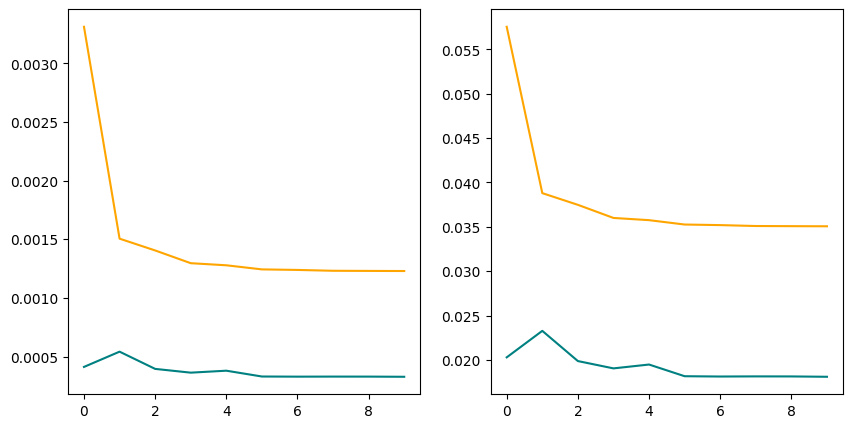

In [33]:
plot_loss_metric(hist, include_metric=True)

In [35]:
load_checkpoint(lstm, 'LSTM/4')

Latest checkpoint will be loaded. Please, mention checkpoint name in 'checkpoint_name' if you want to load a specific checkpoint


ValueError: File format not supported: filepath=None. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [ ]:
mdel_evaluate(lstm, scalers, X_test, y_test)

In [ ]:
X_train, y_train, X_test, y_test, scalers = data_split(n_steps = 50, features = ['Open', 'Low', 'High', 'Volume', 'Close', 'Price Change'], target='Price Change', include_target = False)
X_val, y_val = np.concatenate([arr for arr in X_test.values()]), np.concatenate([arr for arr in y_test.values()])
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

lstm = LSTM_regressor(input_shape=(X_train.shape[1], X_train.shape[2]))
callbacks = callback_setup()
lstm.summary()

In [ ]:
hist = lstm.fit(X_train, y_train, validation_data = [X_val, y_val],
               epochs=10,batch_size=256, verbose=1, callbacks=[callbacks])

In [ ]:
plot_loss_metric(hist, include_metric=True)

In [ ]:
mdel_evaluate(lstm, scalers, X_test, y_test)

In [ ]:

import keras
keras.__version__